<a href="https://colab.research.google.com/github/matrix1690/LearnScala3TheFastWayBook1/blob/main/Breast_cancer_06_11_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import random
import sys
import cv2
import tqdm
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# Import des données

In [ ]:
!git clone https://github.com/MachineLearnia/breast_cancer_public_data.git

fatal: destination path 'breast_cancer_public_data' already exists and is not an empty directory.


In [ ]:
!ls

data  data_2  README.md


In [ ]:
os.chdir("breast_cancer_public_data")

In [ ]:
folder_path = "./data_2/"

In [ ]:
# Train data preparation
classes = ["Negative", "Cancer"]
dataset = []
for class_label in classes:
    class_path = os.path.join(folder_path, class_label)
    label_index = classes.index(class_label)
    for img_file in tqdm.tqdm(os.listdir(class_path)):
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))
        dataset.append([img, label_index])


100%|██████████| 410/410 [00:00<00:00, 1796.55it/s]


array([[[106, 106, 106],
        [145, 145, 145],
        [168, 168, 168],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[154, 154, 154],
        [203, 203, 203],
        [236, 236, 236],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[152, 152, 152],
        [205, 205, 205],
        [243, 243, 243],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 43,  43,  43],
        [ 49,  49,  49],
        [ 50,  50,  50],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 41,  41,  41],
        [ 47,  47,  47],
        [ 48,  48,  48],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 28,  28,  28],
        [ 35,  35,  35],
        [ 37,  37,  37],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
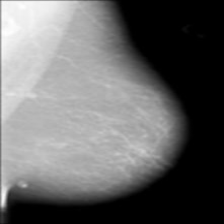

In [ ]:
img

# Normalisation

In [ ]:
X_images = []
y_images = []
for img, label in dataset:
    X_images.append(img)
    y_images.append(label)

X = np.array(X_images) / 255
y = np.array(y_images)

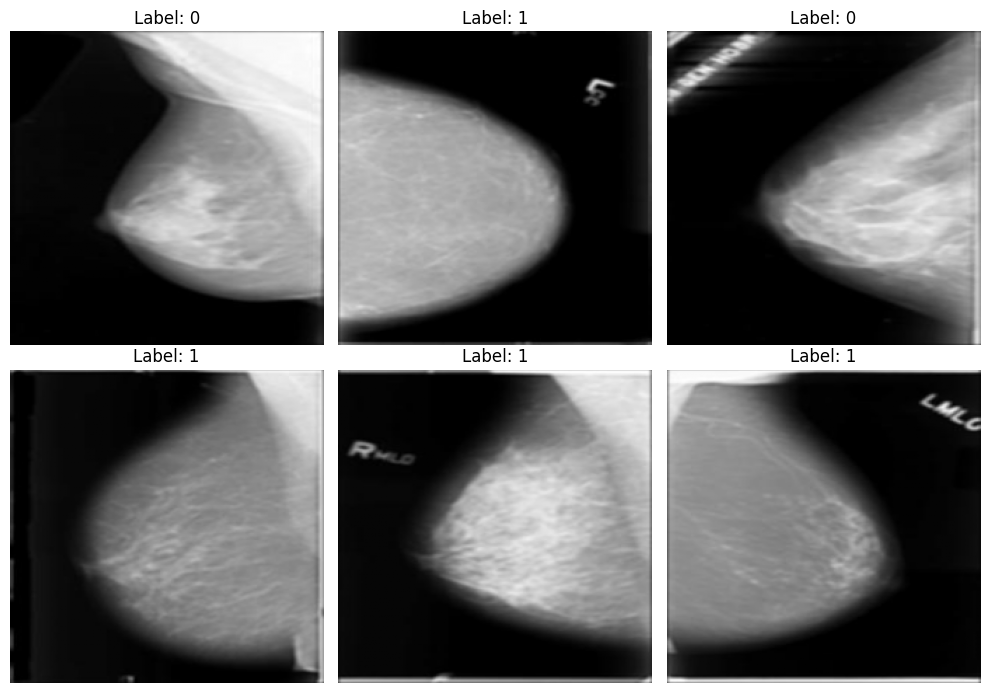

In [ ]:
# Sample Visualization
num_samples = 6
random_samples = np.random.choice(len(X), num_samples, replace=False)

fig, axes = plt.subplots(2, 3, figsize=(10, 7))
for i, idx in enumerate(random_samples):
    ax = axes[i // 3, i % 3]
    ax.imshow(X[idx], cmap='gray')
    ax.set_title(f"Label: {y[idx]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# Découpe en un jeu d'entrainement et un jeu de Test

In [ ]:
X.shape

(820, 224, 224, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_test.shape

(164, 224, 224, 3)

In [ ]:
X_train.shape

(656, 224, 224, 3)

# Entrainement du CNN :

In [ ]:
model = Sequential()

model.add(Conv2D(100, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(100, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(100, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 100)  │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 100)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 100)  │        90,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 100)    │        90,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 67600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     2,163,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,346,265 (8.95 MB)

 Trainable params: 2,346,265 (8.95 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 661ms/step - accuracy: 0.6659 - loss: 0.6623 - val_accuracy: 0.8598 - val_loss: 0.4555
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.8611 - loss: 0.3938 - val_accuracy: 0.8415 - val_loss: 0.3712
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.8839 - loss: 0.3060 - val_accuracy: 0.8902 - val_loss: 0.3315
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.9216 - loss: 0.2040 - val_accuracy: 0.9085 - val_loss: 0.2766
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.9482 - loss: 0.1586 - val_accuracy: 0.9024 - val_loss: 0.2694
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.9621 - loss: 0.1136 - val_accuracy: 0.9329 - val_loss: 0.2314
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.9754 - loss: 0.0667 - val_accuracy: 0.9329 - val_loss: 0.2755
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.9825 - loss: 0.0481 - val_accuracy: 0

# Visualisation des résultats

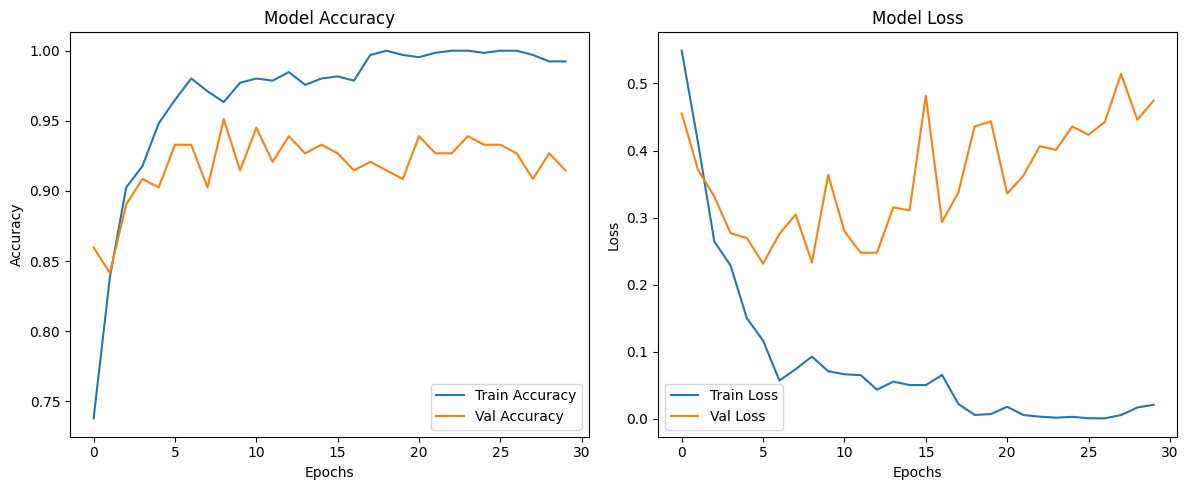

In [ ]:
# Graphs and Metrics
plt.figure(figsize=(12, 5))

# Accuracy Graph
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()